# LJ NVT MC

[Canonical Ensemble Metropolis Monte Carlo (NVT MC)](../methods/nvt_mc.rst) simulations were conducted with the [Lennard-Jones (LJ)](../models/lj.rst) potential.
The reported statistical uncertainties, $\sigma$, were obtained with the [blocking method](../methods/block_averages.rst) as implemented in [FEASST v0.25.1](https://doi.org/10.18434/M3S095).

In [43]:
import pandas as pd
from tabulate import tabulate
from dormms import lennard_jones as lj
from IPython.display import display, HTML
import matplotlib.pyplot as plt
data = lj.CanonicalMonteCarlo().data()
print('Simulation parameters')
display(HTML(tabulate([[r'Number of particles, $N$ :', data['number_particles']],
          [r'cutoff, $r_c/\sigma$ :', str(data['interaction_cutoff']) + ' + long range corrections'],
          ['Equilibration trials :', "{:1.0E}".format(data['equilibration_trials'])],
          ['Production trials :', "{:2.1E}".format(data['production_trials'])],
               ], tablefmt='html')))

Simulation parameters


"Number of particles, $N$ :",500
"cutoff, $r_c/\sigma$ :",3 + long range corrections
Equilibration trials :,5E+07
Production trials :,2.5E+08


In [44]:
display(HTML(pd.DataFrame({r'$k_B T/\epsilon$': data['temperature'],
              r'$\rho\sigma^3$': data['density'],
              r'$U/\epsilon$': data['energy_total'],
              r'$\sigma_{U}/\epsilon$': data['energy_total_blockstdev']}).to_html()))

,$k_B T/\epsilon$,$\rho\sigma^3$,$U/\epsilon$,$\sigma_{U}/\epsilon$
0,0.85,0.001,-0.010335,0.000011
1,0.85,0.003,-0.031042,0.000018
2,0.85,0.005,-0.051854,0.000020
3,0.85,0.007,-0.072884,0.000023
4,0.85,0.009,-0.093966,0.000047
5,0.85,0.776,-5.511923,0.000371
6,0.85,0.780,-5.538624,0.000354
7,0.85,0.820,-5.795079,0.000355
8,0.85,0.860,-6.030030,0.000549
9,0.85,0.900,-6.238393,0.000574


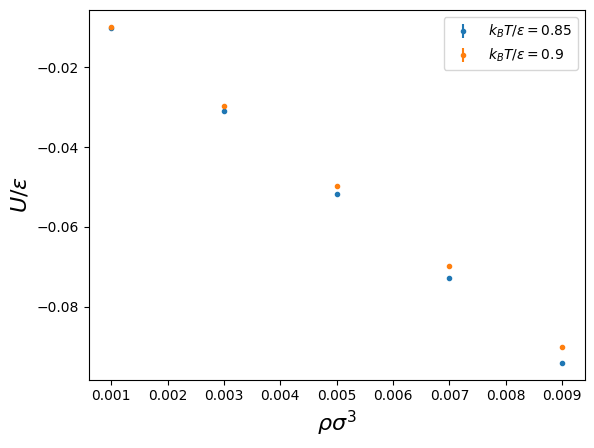

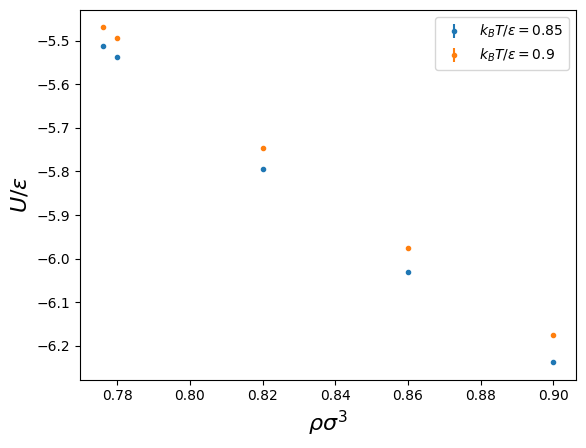

In [45]:
df=pd.DataFrame({'temperature': data['temperature'], 'density': data['density'], 'U': data['energy_total'],'Ustd': data['energy_total_blockstdev']})
def plot_u(df, liquid=False):
    for t in [0.85, 0.9]:
        if liquid:
            dens_cond = (df['density'] >= 0.2)
        else:
            dens_cond = (df['density'] < 0.2)
        df1=df[(df['temperature']==t) & dens_cond]
        plt.errorbar(df1['density'], df1['U'], df1['Ustd'], fmt='.', label=r'$k_B T/\epsilon=$'+str(t))
    plt.xlabel(r'$\rho\sigma^3$', fontsize=16)
    plt.ylabel(r'$U/\epsilon$', fontsize=16)
    plt.legend()
    plt.show()
plot_u(df, liquid=False)
plot_u(df, liquid=True)